In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:\\MachineLearning\\student.csv")

In [3]:
df.head()

,Hours_Study,Attendance,Previous_Score,Parental_Education,Internet_Usage,Extra_Classes,Final_Score,Passed
0,2.87,70,41,1,1.03,1,61,1
1,5.75,81,54,1,3.33,0,88,1
2,4.66,72,81,2,3.79,0,93,1
3,3.99,82,82,2,4.76,1,86,1
4,1.78,52,52,0,7.44,0,36,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hours_Study         250 non-null    float64
 1   Attendance          250 non-null    int64  
 2   Previous_Score      250 non-null    int64  
 3   Parental_Education  250 non-null    int64  
 4   Internet_Usage      250 non-null    float64
 5   Extra_Classes       250 non-null    int64  
 6   Final_Score         250 non-null    int64  
 7   Passed              250 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 15.8 KB


In [5]:
df.describe()

,Hours_Study,Attendance,Previous_Score,Parental_Education,Internet_Usage,Extra_Classes,Final_Score,Passed
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,3.452160,75.364000,61.416000,1.008000,4.353640,0.488000,70.776000,0.980000
std,1.487269,14.056666,19.166229,0.816457,2.040195,0.500859,16.306238,0.140281
min,1.030000,50.000000,30.000000,0.000000,1.030000,0.000000,21.000000,0.000000
25%,2.152500,64.250000,45.250000,0.000000,2.612500,0.000000,59.000000,1.000000
50%,3.510000,75.000000,61.500000,1.000000,4.235000,0.000000,72.000000,1.000000
75%,4.767500,86.000000,79.000000,2.000000,6.092500,1.000000,82.000000,1.000000
max,5.930000,99.000000,94.000000,2.000000,7.990000,1.000000,111.000000,1.000000


In [6]:
df.isnull().sum()

Hours_Study           0
Attendance            0
Previous_Score        0
Parental_Education    0
Internet_Usage        0
Extra_Classes         0
Final_Score           0
Passed                0
dtype: int64

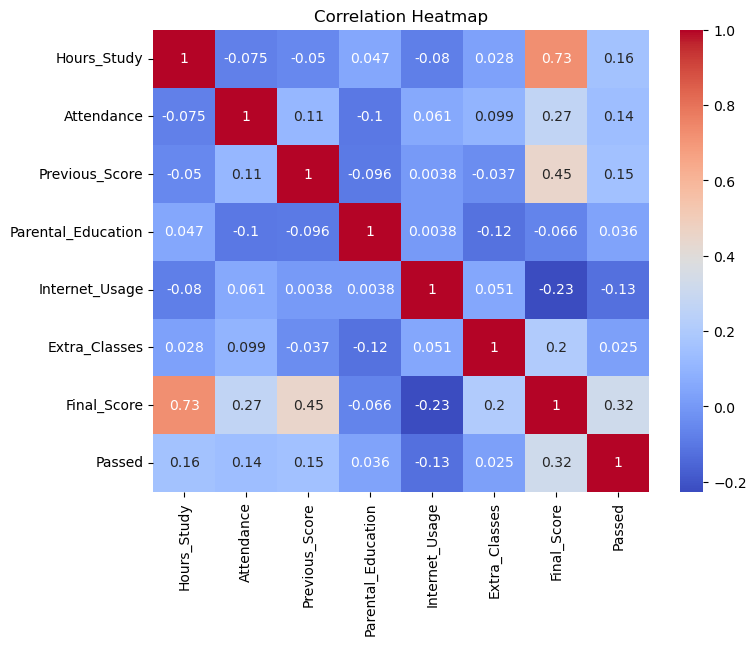

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

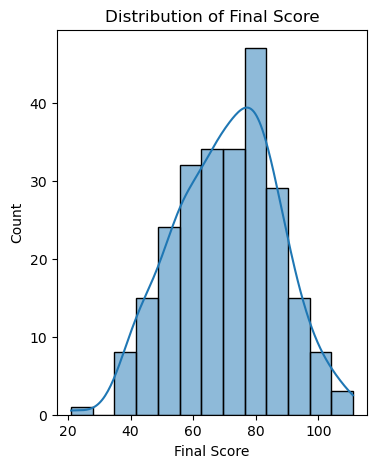

In [8]:
plt.figure(figsize=(4,5))
sns.histplot(df["Final_Score"], kde=True)
plt.title("Distribution of Final Score")
plt.xlabel("Final Score")
plt.ylabel("Count")
plt.show()

<h3>LINEAR REGRESSION</h3>

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [10]:
Y = df['Final_Score']
X = df[['Hours_Study','Attendance','Previous_Score','Extra_Classes']]


model = LinearRegression()
model.fit(X, Y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


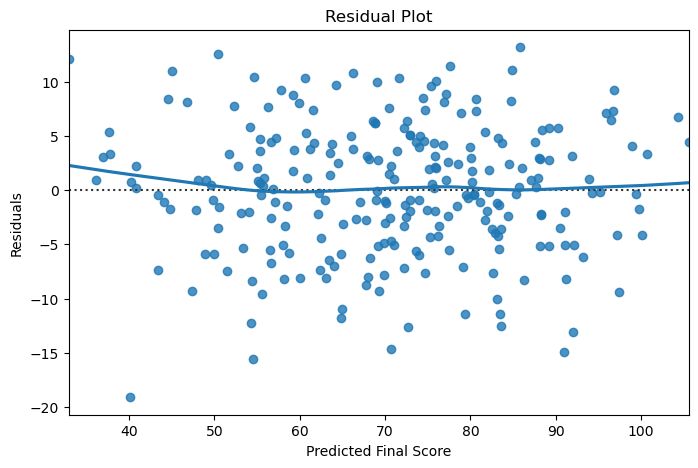

In [11]:
pred = model.predict(X)
residuals = Y - pred

plt.figure(figsize=(8,5))
sns.residplot(x=pred, y=residuals, lowess=True)
plt.xlabel("Predicted Final Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [12]:
r2 = r2_score(Y, pred)
rmse = np.sqrt(mean_squared_error(Y, pred))

print("R2 Score:", r2)
print("RMSE:", rmse)


R2 Score: 0.8651198562815741
RMSE: 5.9766449385960225


In [13]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
data = np.array([[4, 85, 70, 1]])
prediction = model.predict(data)
print("Predicted Final Score:", prediction[0])


Predicted Final Score: 84.51704174893572


<h3>Logestic Regression</h3>

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [15]:
model = LogisticRegression(max_iter=10)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, pred, average='weighted', zero_division=0))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))

Accuracy: 0.02
Precision: 0.0008
Recall: 0.02

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
datas = np.array([[2.5, 60, 45, 0]])

datas_scaled = scaler.transform(data)

# prediction
prediction = model.predict(datas_scaled)

if prediction[0] > 45:
    print (1)
else:
    print (0)

1


<h3>K-means</h3>

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df[['Hours_Study', 'Internet_Usage', 'Attendance']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


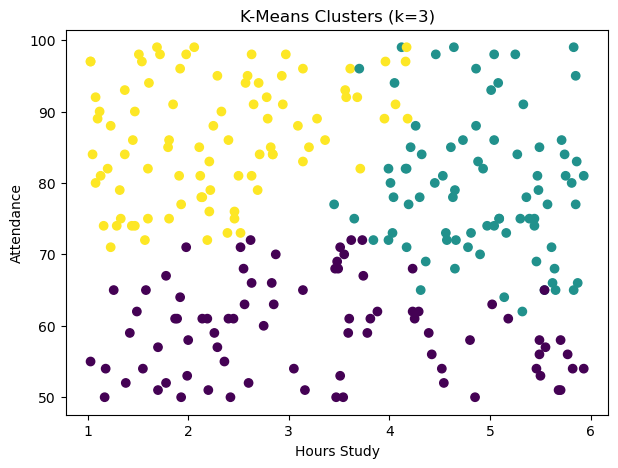

In [18]:
plt.figure(figsize=(7,5))
plt.scatter(df['Hours_Study'], df['Attendance'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Hours Study")
plt.ylabel("Attendance")
plt.title("K-Means Clusters (k=3)")
plt.show()

In [19]:
cluster_summary = df.groupby('Cluster')[['Hours_Study', 'Internet_Usage', 'Attendance']].mean()
cluster_summary

,Hours_Study,Internet_Usage,Attendance
Cluster,,,
0,3.287195,4.534634,59.548780
1,4.910000,3.642750,79.425000
2,2.280568,4.831250,86.409091
